In [1]:
#Loading up all libraries
import numpy as np  
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  
from keras.models import Sequential  
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg
%matplotlib inline
import math  
import cv2  
import datetime

Using TensorFlow backend.


In [2]:
# dimensions of our images.  
img_width, img_height = 224, 224  
   
top_model_weights_path = 'bottleneck_fc_model.h5'  
train_data_dir = 'data/train'  
validation_data_dir = 'data/validation' 
test_data_dir= 'data/test'
   
# number of epochs to train top model  
epochs = 100  
# batch size used by flow_from_directory and predict_generator  
batch_size = 50  

In [3]:
start = datetime.datetime.now()
datagen_top = ImageDataGenerator(rescale=1./255)  
generator_top = datagen_top.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 13412 images belonging to 6 classes.
Time:  0:00:01.486403


In [4]:
generator_top = datagen_top.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)  

Found 2549 images belonging to 6 classes.


In [5]:
generator_top = datagen_top.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('bottleneck_features_test.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes) 

Found 1845 images belonging to 6 classes.


First Model Softmax One Hidden Layer

In [7]:
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(num_classes, activation='softmax'))  

model.compile(optimizer='rmsprop',  
          loss='categorical_crossentropy', metrics=['accuracy'])  

history = model.fit(train_data, train_labels,  
      epochs=5,  
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Train on 13412 samples, validate on 2549 samples
Epoch 1/5
13412/13412 [==============================] - 14s 1ms/step - loss: 1.7422 - acc: 0.6917 - val_loss: 0.5679 - val_acc: 0.8191
Epoch 2/5
13412/13412 [==============================] - 14s 1ms/step - loss: 0.4938 - acc: 0.8374 - val_loss: 0.3109 - val_acc: 0.8945
Epoch 3/5
13412/13412 [==============================] - 14s 1ms/step - loss: 0.4035 - acc: 0.8720 - val_loss: 0.3073 - val_acc: 0.8984
Epoch 4/5
13412/13412 [==============================] - 14s 1ms/step - loss: 0.3428 - acc: 0.8887 - val_loss: 0.3351 - val_acc: 0.8972
Epoch 5/5
2549/2549 [==============================] - 1s 222us/step
[INFO] accuracy: 85.48%
[INFO] Loss: 0.644370982038327
Time:  0:01:11.328942


# Second Model softmax two hidden layer and learning rate

In [6]:
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation='relu'))  
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])  

history = model.fit(train_data, train_labels,  
      epochs=7,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

NameError: name 'optimizers' is not defined

## second model softmax but with leaky relu

In [7]:
import keras
from keras import optimizers
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])  

history = model.fit(train_data, train_labels,  
      epochs=7,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

/Users/Iffy/anaconda3/lib/python3.6/site-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 13412 samples, validate on 2549 samples
Epoch 1/7
13412/13412 [==============================] - 6s 436us/step - loss: 0.7599 - acc: 0.7335 - val_loss: 0.4279 - val_acc: 0.8505
Epoch 2/7
13412/13412 [==============================] - 5s 407us/step - loss: 0.4388 - acc: 0.8505 - val_loss: 0.3815 - val_acc: 0.8741
Epoch 3/7
13412/13412 [==============================] - 6s 482us/step - loss: 0.3464 - acc: 0.8841 - val_loss: 0.3667 - val_acc: 0.8835
Epoch 4/7
13412/13412 [==============================] - 6s 484us/step - loss: 0.2942 - acc: 0.9015 - val_loss: 0.3034 - val_acc: 0.8937
Epoch 5/7
13412/13412 [==============================] - 6s 449us/step - loss: 0.2580 - acc: 0.9166 - val_loss: 0.3120 - val_acc: 0.9004
Epoch 6/7
13412/13412 [==============================] - 5s 409us/step - loss: 0.2261 - acc: 0.9259 - val_loss: 0.2812 - val_acc: 0.9117
Epoch 7/7
2549/2549 [==============================] - 0s 99us/step
[INFO] accuracy: 90.82%
[INFO] Loss: 0.2884012806463494
Time:

## visualization

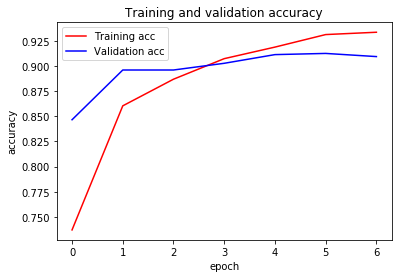

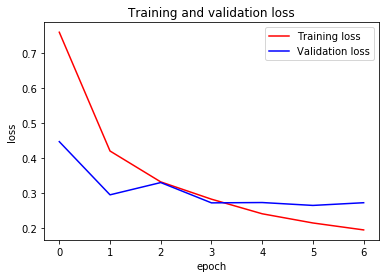

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 100)               2508900   
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_13 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 6)                 306       
Total params: 2,514,256
Trainable params: 2,514,256
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.evaluate(test_data, test_labels)

1845/1845 [==============================] - 0s 173us/step


[0.26058631379429886, 0.9149051491484086]

In [102]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [103]:
preds = np.round(model.predict(test_data),0)

In [104]:
len(test_labels)

1845

In [105]:
classification_metrics = metrics.classification_report(test_labels, preds)

/Users/Iffy/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [106]:
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       371
           1       0.80      0.92      0.86       203
           2       0.92      0.86      0.89       152
           3       0.96      0.96      0.96       472
           4       0.91      0.95      0.93       403
           5       0.98      0.82      0.89       244

   micro avg       0.93      0.91      0.92      1845
   macro avg       0.92      0.89      0.91      1845
weighted avg       0.93      0.91      0.92      1845
 samples avg       0.91      0.91      0.91      1845



In [107]:
import pandas as pd

In [135]:
df.idxmax(axis=1)

371

In [130]:
test_labels_tentative = pd.DataFrame(test_labels).idxmax(axis=1)
preds_tentative = pd.DataFrame(preds).idxmax(axis=1)

In [131]:
test_labels_tentative

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1815    5
1816    5
1817    5
1818    5
1819    5
1820    5
1821    5
1822    5
1823    5
1824    5
1825    5
1826    5
1827    5
1828    5
1829    5
1830    5
1831    5
1832    5
1833    5
1834    5
1835    5
1836    5
1837    5
1838    5
1839    5
1840    5
1841    5
1842    5
1843    5
1844    5
Length: 1845, dtype: int64

In [109]:
len(test_labels_tentative), len(test_labels)

(1845, 1845)

In [110]:
len(preds_tentative), len(preds)

(1845, 1845)

In [111]:
confusion_matrix= confusion_matrix(test_labels_tentative, preds_tentative)

In [112]:
confusion_matrix

array([[332,  15,   1,   0,  23,   0],
       [  4, 186,   1,   5,   4,   3],
       [  7,   5, 130,   9,   0,   1],
       [  6,   6,   6, 452,   1,   1],
       [ 12,   8,   0,   2, 381,   0],
       [ 17,  12,   3,   4,   8, 200]])

In [119]:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [120]:
import itertools

Normalized confusion matrix


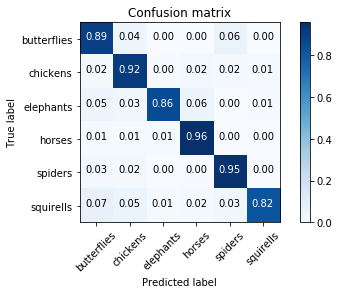

In [122]:
plot_confusion_matrix(confusion_matrix, 
                      ['butterflies', 'chickens', 'elephants', 'horses', 'spiders', 'squirells'],
                     normalize=True)

GRIDSEARCH

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [46]:
param_grid = dict(epochs=[x for x in range(1,15)])

In [54]:
grid = GridSearchCV(estimator=model, scoring='accuracy' ,param_grid=param_grid, n_jobs=-1)

In [55]:
grid_result = grid.fit(train_data, train_labels)

/Users/Iffy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0xba388b198>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

Third Model Softmax with multiple hidden and dropout later

In [54]:
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(200, activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu')) 
model.add(Dropout(0.6))
model.add(Dense(50, activation='relu'))  
model.add(Dense(num_classes, activation='softmax'))  

model.compile(optimizer='rmsprop',  
          loss='categorical_crossentropy', metrics=['accuracy'])  

history = model.fit(train_data, train_labels,  
      epochs=20,  
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Train on 13412 samples, validate on 2549 samples
Epoch 1/20
13412/13412 [==============================] - 12s 914us/step - loss: 1.3061 - acc: 0.5381 - val_loss: 0.6616 - val_acc: 0.7603
Epoch 2/20
13412/13412 [==============================] - 11s 784us/step - loss: 0.8044 - acc: 0.7053 - val_loss: 0.6882 - val_acc: 0.7717
Epoch 3/20
13412/13412 [==============================] - 10s 769us/step - loss: 0.6879 - acc: 0.7505 - val_loss: 0.4405 - val_acc: 0.8427
Epoch 4/20
13412/13412 [==============================] - 10s 776us/step - loss: 0.6346 - acc: 0.7707 - val_loss: 0.3599 - val_acc: 0.9000
Epoch 5/20
13412/13412 [==============================] - 10s 778us/step - loss: 0.5947 - acc: 0.7835 - val_loss: 0.3445 - val_acc: 0.8984
Epoch 6/20
13412/13412 [==============================] - 10s 777us/step - loss: 0.5653 - acc: 0.7909 - val_loss: 0.3544 - val_acc: 0.8980
Epoch 7/20
13412/13412 [==============================] - 10s 779us/step - loss: 0.5400 - acc: 0.8058 - val_loss: 0.3

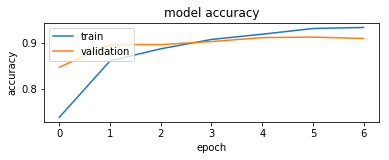

In [11]:
plt.figure(1)  

# summarize history for accuracy  

plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
  

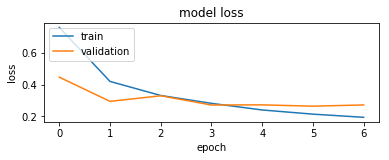

In [12]:
# summarize history for loss  

plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

In [50]:
image_path = 'data/test/elephants/OIP-wxKaLAcA94Sf5lyZ65A08gHaFs.jpeg'  

orig = mpimg.imread(image_path)  

print("[INFO] Image Loaded")  
image = load_img(image_path, target_size=(224, 224))  
image = img_to_array(image)  

# important! otherwise the predictions will be '0'  
image = image / 255  

image = np.expand_dims(image, axis=0)  
# print(image)

[INFO] Image Loaded


In [51]:
# build the VGG16 network  
model = applications.VGG16(include_top=False, weights='imagenet')  

# get the bottleneck prediction from the pre-trained VGG16 model  
bottleneck_prediction = model.predict(image)  

# build top model  
model = Sequential()  
model.add(Flatten(input_shape=bottleneck_prediction.shape[1:]))  
model.add(Dense(100, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation='relu'))  
model.add(Dense(num_classes, activation='softmax'))  

model.load_weights(top_model_weights_path)  

# use the bottleneck prediction on the top model to get the final classification  
class_predicted = model.predict_classes(bottleneck_prediction)

In [52]:
inID = class_predicted[0]  

class_dictionary = generator_top.class_indices  

inv_map = {v: k for k, v in class_dictionary.items()}  

label = inv_map[inID]  

# get the prediction label  
print("Image ID: {}, Label: {}".format(inID, label))  

# # display the predictions with the image  
# cv2.putText(orig, "Predicted: {}".format(label), (10, 30), cv2.FONT_HERSHEY_PLAIN, 1.5, (43, 99, 255), 2)  

# cv2.imshow("Classification", orig)  
# cv2.waitKey(0)  
# cv2.destroyAllWindows()  

Image ID: 2, Label: elephants


<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
(224, 224, 3)


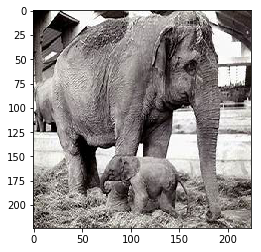

In [53]:
from keras.preprocessing import image

# img = np.random.rand(224,224,3)
# plt.imshow(img)
# plt.show()

img_path = image_path
img = image.load_img(img_path, target_size=(224, 224))
print(type(img))

x = image.img_to_array(img)
print(type(x))
print(x.shape)
plt.imshow(x/255.)

In [90]:
# import lime
# from lime import lime_image

In [97]:
%load_ext autoreload
%reload_ext 
%autoreload
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('data/test/elephants', 'OIP-wxKaLAcA94Sf5lyZ65A08gHaFs.jpeg')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


UsageError: Missing module name.


In [98]:

explainer = lime_image.LimeImageExplainer()

In [100]:
from skimage.segmentation import mark_boundaries
temp, mask = explainer.get_image_and_mask(295, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

AttributeError: 'LimeImageExplainer' object has no attribute 'get_image_and_mask'

In [34]:
class_dictionary

{'butterflies': 0,
 'chickens': 1,
 'elephants': 2,
 'horses': 3,
 'spiders': 4,
 'squirels': 5}